In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('https://raw.githubusercontent.com/eshentong/BA780-team10-project/main/readmission.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Setting up df3 with columns in 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum','A1Cresult', 'metformin', 'repaglinide'

In [2]:
df3 = df[['diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum','A1Cresult', 'metformin', 'repaglinide']]
df3.head()

,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide
0,250.83,?,?,1,None,None,No,No
1,276,250.01,255,9,None,None,No,No
2,648,250,V27,6,None,None,No,No
3,8,250.43,403,7,None,None,No,No
4,197,157,250,5,None,None,No,No


In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   diag_1            101766 non-null  object
 1   diag_2            101766 non-null  object
 2   diag_3            101766 non-null  object
 3   number_diagnoses  101766 non-null  int64 
 4   max_glu_serum     101766 non-null  object
 5   A1Cresult         101766 non-null  object
 6   metformin         101766 non-null  object
 7   repaglinide       101766 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


## Group three diagnoses into higher level dieases groups

In [31]:
# http://www.icd9data.com/2008/Volume1/default.htm
def diag_to_cat(value):
    if 'V' in value:
        return 'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services'
    elif 'E' in value:
        return 'Supplementary Classification Of External Causes Of Injury And Poisoning'
    elif '?' in value:
        return None
    value = float(value)
    value = int(value)
    if value in range(1, 140):
        return 'Infectious And Parasitic Diseases'
    elif value in range(140, 240):
        return 'Neoplasms'
    elif value in range(240, 280):
        return 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'
    elif value in range(280, 290):
        return 'Diseases Of The Blood And Blood-Forming Organs'
    elif value in range(290, 320):
        return 'Mental Disorders'
    elif value in range(320, 390):
        return 'Diseases Of The Nervous System And Sense Organs'
    elif value in range(390, 460):
        return 'Diseases Of The Circulatory System'
    elif value in range(460, 520):
        return 'Diseases Of The Respiratory System'
    elif value in range(520, 580):
        return 'Diseases Of The Digestive System'
    elif value in range(580, 630):
        return 'Diseases Of The Genitourinary System'
    elif value in range(630, 680):
        return 'Complications Of Pregnancy, Childbirth, And The Puerperium'
    elif value in range(680, 710):
        return 'Diseases Of The Skin And Subcutaneous Tissue'
    elif value in range(710, 740):
        return 'Diseases Of The Musculoskeletal System And Connective Tissue'
    elif value in range(740, 760):
        return 'Congential Anomalies'
    elif value in range(760, 780):
        return 'Certain Conditions Originating In The Perinatal Period'
    elif value in range(780, 800):
        return 'Symptoms, Signs, And Ill-Defined Conditions'
    elif value in range(800, 1000):
        return 'Injury And Poisoning'
    else:
        return 'Not in Dictionary'



In [38]:
df3['diag_1_cat'] = df3['diag_1'].apply(diag_to_cat)
df3['diag_2_cat'] = df3['diag_2'].apply(diag_to_cat)
df3['diag_3_cat'] = df3['diag_3'].apply(diag_to_cat)
df3 = df3.drop(columns= ['diag_1', 'diag_2', 'diag_3'])


<ipython-input-38-b4dd782e390f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['diag_1_cat'] = df3['diag_1'].apply(diag_to_cat)
<ipython-input-38-b4dd782e390f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['diag_2_cat'] = df3['diag_2'].apply(diag_to_cat)
<ipython-input-38-b4dd782e390f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [39]:
df3.head()

,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,diag_1_cat,diag_2_cat,diag_3_cat
0,1,None,None,No,No,"Endocrine, Nutritional And Metabolic Diseases,...",None,None
1,9,None,None,No,No,"Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,..."
2,6,None,None,No,No,"Complications Of Pregnancy, Childbirth, And Th...","Endocrine, Nutritional And Metabolic Diseases,...",Supplementary Classification Of Factors Influe...
3,7,None,None,No,No,Infectious And Parasitic Diseases,"Endocrine, Nutritional And Metabolic Diseases,...",Diseases Of The Circulatory System
4,5,None,None,No,No,Neoplasms,Neoplasms,"Endocrine, Nutritional And Metabolic Diseases,..."


## Mapping Prescriptions to yes or no prescription

In [70]:
prescription_mapping = {'Down':1, 'Up':1, 'Steady':1, 'No':0}
df3['metformin'] = df3['metformin'].replace(prescription_mapping)
df3['repaglinide'] = df3['repaglinide'].replace(prescription_mapping)
metformin_prescribed = df3['metformin'].sum()
repaglinide_prescribed = df3['repaglinide'].sum()
total = len(df3['metformin'])
print('metformin_perct:', round(metformin_prescribed/total * 100, 4), '%')
print('repaglinide:', round(repaglinide_prescribed/total * 100, 4), '%')

metformin_perct: 19.6411 %
repaglinide: 1.5123 %


In [58]:
metformin_summary = df.groupby(['metformin'])['metformin'].count()
metformin_summary

metformin
Down        575
No        81778
Steady    18346
Up         1067
Name: metformin, dtype: int64

## Mapping testing result to normal, abnormal, NULL

In [61]:
glu_serum_test_mapping = {'>300':1, '>200':1, 'Norm':0, 'None':None}
A1C_test_mapping = {'>8':1, '>7':1, 'Norm':0, 'None':None}
df3['max_glu_serum'] = df3['max_glu_serum'].replace(glu_serum_test_mapping)
df3['A1Cresult'] = df3['A1Cresult'].replace(A1C_test_mapping)
df3['max_glu_serum'].isnull().sum()

96420

## Diagnoses count plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'),
  Text(1, 0, 'Complications Of Pregnancy, Childbirth, And The Puerperium'),
  Text(2, 0, 'Infectious And Parasitic Diseases'),
  Text(3, 0, 'Neoplasms'),
  Text(4, 0, 'Diseases Of The Circulatory System'),
  Text(5, 0, 'Diseases Of The Respiratory System'),
  Text(6, 0, 'Injury And Poisoning'),
  Text(7, 0, 'Diseases Of The Skin And Subcutaneous Tissue'),
  Text(8, 0, 'Diseases Of The Musculoskeletal System And Connective Tissue'),
  Text(9, 0, 'Diseases Of The Digestive System'),
  Text(10, 0, 'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services'),
  Text(11, 0, 'Symptoms, Signs, And Ill-Defined Conditions'),
  Text(12, 0, 'Diseases Of The Genitourinary System'),
  Text(13, 0, 'Mental Disorders'),
  Text(14, 0, 'Diseases Of The Nervous System And Sense Organs'),
  

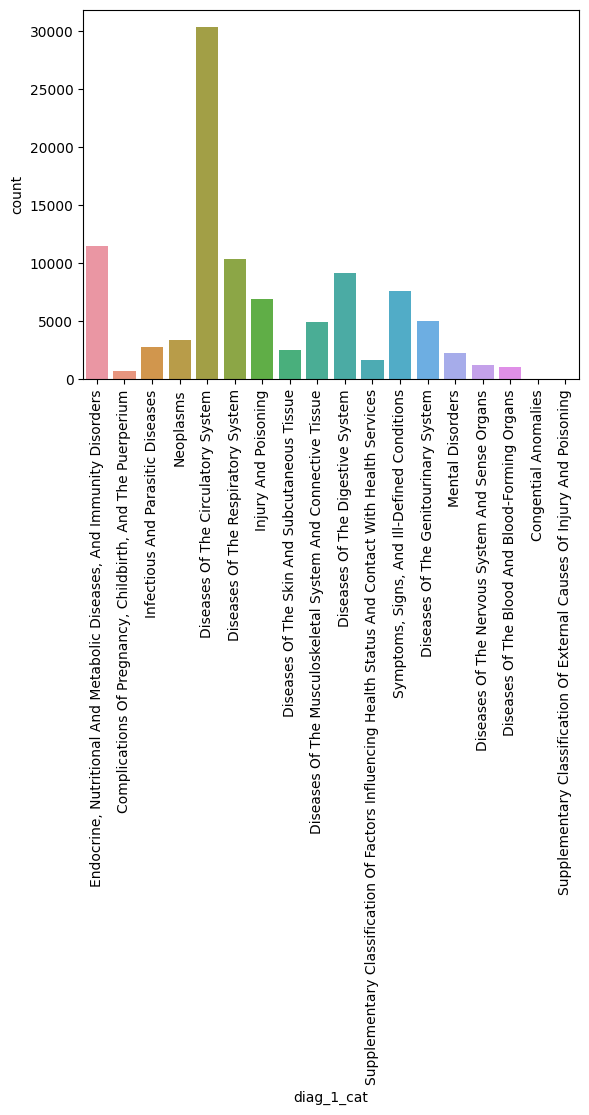

In [48]:

sns.countplot(data=df3, x='diag_1_cat')
plt.xticks(rotation = 90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'),
  Text(1, 0, 'Neoplasms'),
  Text(2, 0, 'Diseases Of The Circulatory System'),
  Text(3, 0, 'Diseases Of The Respiratory System'),
  Text(4, 0, 'Diseases Of The Blood And Blood-Forming Organs'),
  Text(5, 0, 'Injury And Poisoning'),
  Text(6, 0, 'Diseases Of The Musculoskeletal System And Connective Tissue'),
  Text(7, 0, 'Diseases Of The Genitourinary System'),
  Text(8, 0, 'Infectious And Parasitic Diseases'),
  Text(9, 0, 'Diseases Of The Digestive System'),
  Text(10, 0, 'Diseases Of The Skin And Subcutaneous Tissue'),
  Text(11, 0, 'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services'),
  Text(12, 0, 'Diseases Of The Nervous System And Sense Organs'),
  Text(13, 0, 'Symptoms, Signs, And Ill-Defined Conditions'),
  Text(14, 0, 'Mental Disorders'),
  Text(15, 0, 

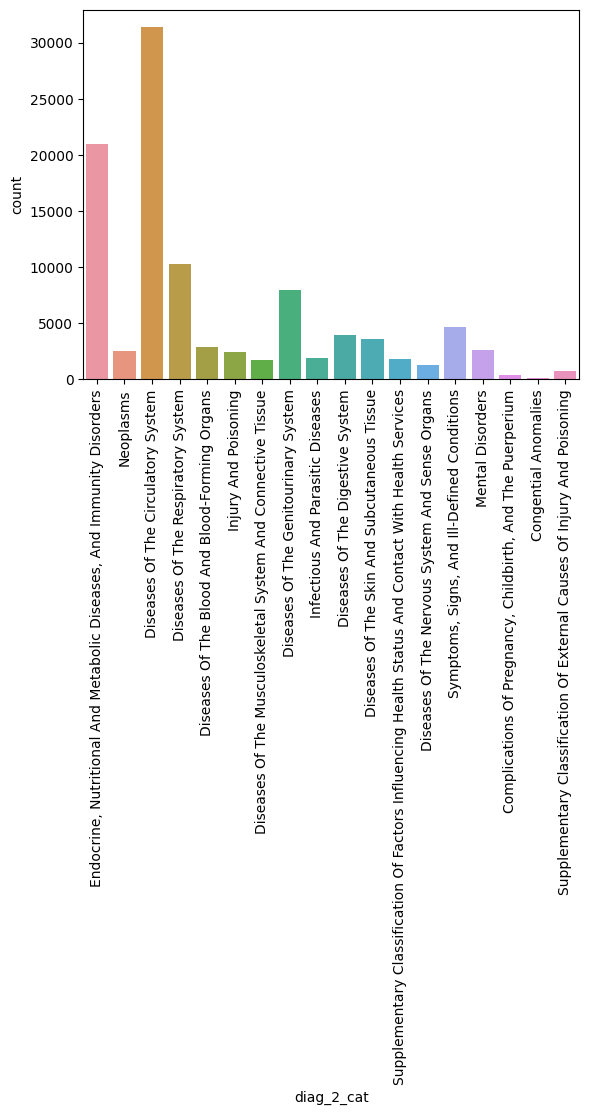

In [50]:
sns.countplot(data=df3, x='diag_2_cat')
plt.xticks(rotation = 90)
#sns.countplot(data=df3, x='diag_3_cat',  ax=axes[2])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'),
  Text(1, 0, 'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services'),
  Text(2, 0, 'Diseases Of The Circulatory System'),
  Text(3, 0, 'Infectious And Parasitic Diseases'),
  Text(4, 0, 'Diseases Of The Respiratory System'),
  Text(5, 0, 'Injury And Poisoning'),
  Text(6, 0, 'Neoplasms'),
  Text(7, 0, 'Diseases Of The Genitourinary System'),
  Text(8, 0, 'Diseases Of The Musculoskeletal System And Connective Tissue'),
  Text(9, 0, 'Symptoms, Signs, And Ill-Defined Conditions'),
  Text(10, 0, 'Diseases Of The Digestive System'),
  Text(11, 0, 'Diseases Of The Skin And Subcutaneous Tissue'),
  Text(12, 0, 'Mental Disorders'),
  Text(13, 0, 'Congential Anomalies'),
  Text(14, 0, 'Supplementary Classification Of External Causes Of Injury And Poisoning'),
  Text(15, 0, 'D

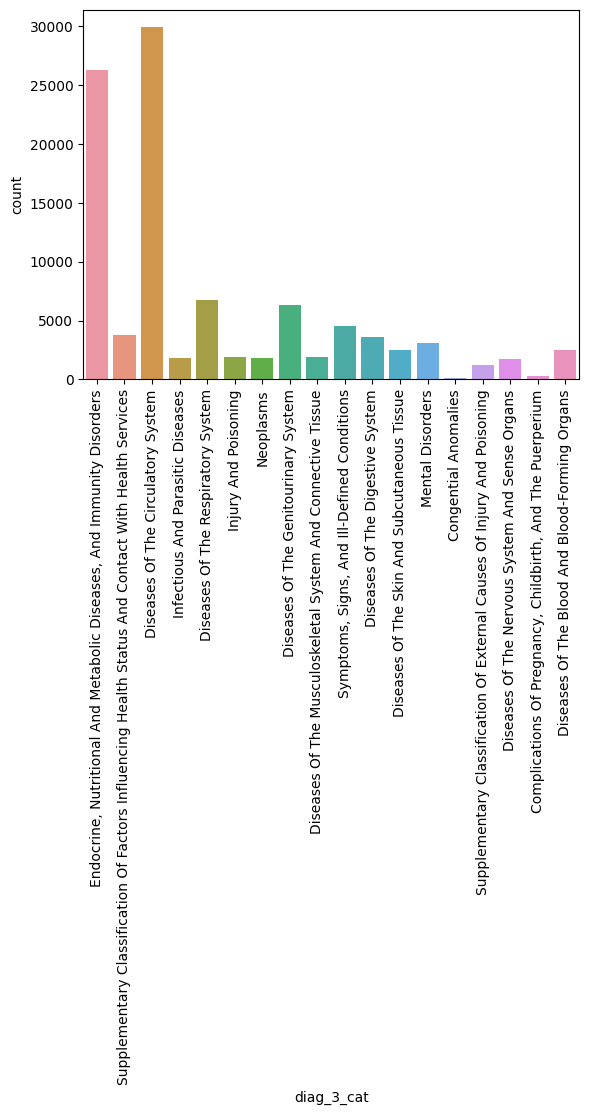

In [51]:
sns.countplot(data=df3, x='diag_3_cat')
plt.xticks(rotation = 90)


## Final dataframe

In [71]:
df3.head()

,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,diag_1_cat,diag_2_cat,diag_3_cat
0,1,NaN,NaN,0,0,"Endocrine, Nutritional And Metabolic Diseases,...",None,None
1,9,NaN,NaN,0,0,"Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,..."
2,6,NaN,NaN,0,0,"Complications Of Pregnancy, Childbirth, And Th...","Endocrine, Nutritional And Metabolic Diseases,...",Supplementary Classification Of Factors Influe...
3,7,NaN,NaN,0,0,Infectious And Parasitic Diseases,"Endocrine, Nutritional And Metabolic Diseases,...",Diseases Of The Circulatory System
4,5,NaN,NaN,0,0,Neoplasms,Neoplasms,"Endocrine, Nutritional And Metabolic Diseases,..."
